Calculate the data facts:

$insight := \{subspace, measures, dimension, type, parameters, focus, score\}$

- subspace: subset
- measure: dependent variables (Y: Sales)
- dimension: independent variables (X: Category)
- type: fact type
- parameters: details of the fact
- focus: emphasized data point ()
- score: how the fact matched users' intent

Single Point Insight：

2. Outstanding No. 1
3. Outstanding Top 2
4. Outstanding Last
5. Evenness

Single Shape Insight:

1. Change Point
2. Outlier
3. Seasonality
4. Trend

Compound Insight:

1. 2DClustering
2. Correlation
3. Cross-Measure Correlation
4. Casual relation

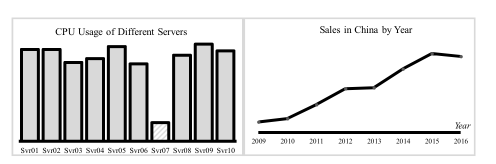

11111 {} Year       Sales  Profit
Year               
2011    800     260
2012   1200     360
2013   1000     310
2014   1400     450
2015   2100     650
2016   1700     510


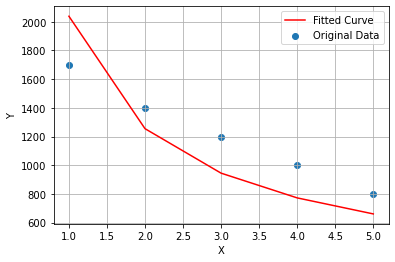

11111 {'Country': 'China'} Year               Sales  Profit
Country Year               
China   2011    300     100
        2012    500     150
        2013    400     130
        2014    600     200
        2015   1000     320
        2016    800     240


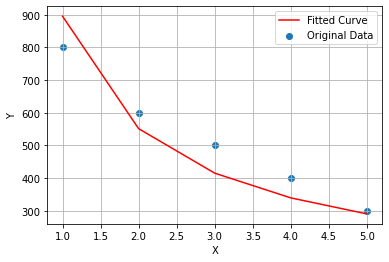

11111 {'Country': 'USA'} Year               Sales  Profit
Country Year               
USA     2011    500     160
        2012    700     210
        2013    600     180
        2014    800     250
        2015   1100     330
        2016    900     270


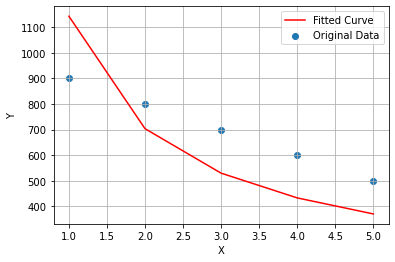

11111 {'Product': 'A'} Year               Sales  Profit
Product Year               
A       2011    800     260
        2012   1200     360
        2013   1000     310


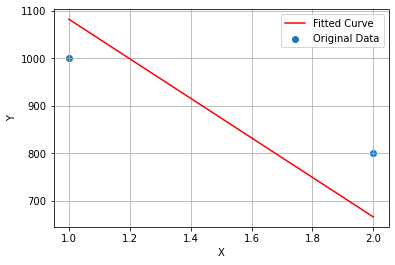

11111 {'Product': 'B'} Year               Sales  Profit
Product Year               
B       2014   1400     450
        2015   2100     650
        2016   1700     510


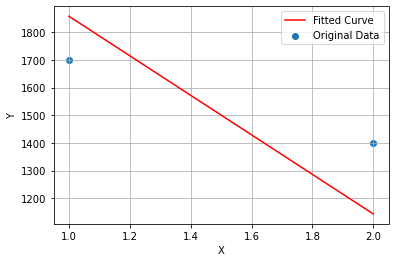

11111 {'Country': 'China', 'Product': 'A'} Year                       Sales  Profit
Country Product Year               
China   A       2011    300     100
                2012    500     150
                2013    400     130


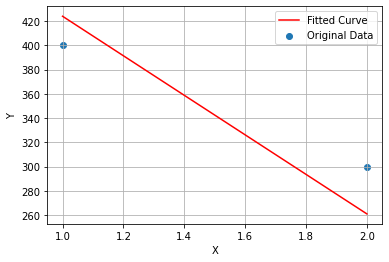

11111 {'Country': 'China', 'Product': 'B'} Year                       Sales  Profit
Country Product Year               
China   B       2014    600     200
                2015   1000     320
                2016    800     240


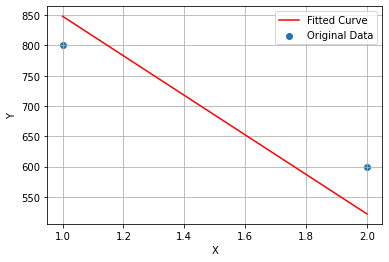

11111 {'Country': 'USA', 'Product': 'A'} Year                       Sales  Profit
Country Product Year               
USA     A       2011    500     160
                2012    700     210
                2013    600     180


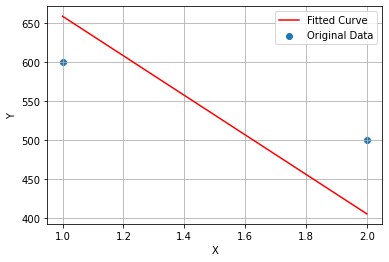

11111 {'Country': 'USA', 'Product': 'B'} Year                       Sales  Profit
Country Product Year               
USA     B       2014    800     250
                2015   1100     330
                2016    900     270


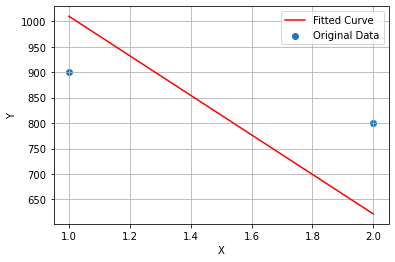

Rank 1: {'subspace': {'Country': 'China'}, 'breakdown_dim': 'Year', 'Outstanding No. 1': 1000, 'score_impact': 0.5, 'score_significance': 0.9039212866237254, 'score': 0.7827449006366077}
Rank 2: {'subspace': {'Country': 'China', 'Product': 'A'}, 'breakdown_dim': 'Year', 'Outstanding No. 1': 500, 'score_impact': 0.25, 'score_significance': 0.9851720034718493, 'score': 0.7646204024302944}
Rank 3: {'subspace': {'Country': 'China', 'Product': 'B'}, 'breakdown_dim': 'Year', 'Outstanding No. 1': 1000, 'score_impact': 0.25, 'score_significance': 0.9851720034408503, 'score': 0.7646204024085952}
Rank 4: {'subspace': {'Product': 'B'}, 'breakdown_dim': 'Year', 'Outstanding No. 1': 2100, 'score_impact': 0.5, 'score_significance': 0.8241886620253254, 'score': 0.7269320634177278}
Rank 5: {'subspace': {'Product': 'A'}, 'breakdown_dim': 'Year', 'Outstanding No. 1': 1200, 'score_impact': 0.5, 'score_significance': 0.8026659640303653, 'score': 0.7118661748212557}
Rank 6: {'subspace': {}, 'breakdown_dim'

In [3]:
import pandas as pd
from itertools import product
from itertools import combinations
from insights import *
import matplotlib.pyplot as plt

omega_s = 0.7
omega_c = 0.3

measures = ['Sales','Profit']
# Define a simple dataset
data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2011, 2012, 2013, 2014, 2015, 2016],
    'Country': ['China', 'China', 'China', 'China', 'China', 'China', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
    'Product': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
    'Sales': [300, 500, 400, 600, 1000, 800, 500, 700, 600, 800, 1100, 900],
    'Profit': [100, 150, 130, 200, 320, 240, 160, 210, 180, 250, 330, 270]
}
df = pd.DataFrame(data)

dimensions = ['Year', 'Country', 'Product']
max_subspace_size = 2
freq = 1
X = []
Y=[]
insights_name = ["Attribution","Outstanding_No1","Outstanding_Top2","Outstanding_Last","Evenness"]
insights = []

# Generate all possible subspaces
subspaces = [{}]
for i in range(1, len(dimensions) + 1):
    for combination in combinations(dimensions, i):
        for values in product(*[df[dim].unique() for dim in combination]):
            subspaces.append(dict(zip(combination, values)))

# Generate sibling groups for each subspace
for subspace in subspaces:
    subspace_df = df.copy()
    for key, value in subspace.items():
        subspace_df = subspace_df[subspace_df[key] == value]
    # Get the breakdown dimensions
    breakdown_dims = [dim for dim in dimensions if dim not in subspace.keys()]

    for breakdown_dim in breakdown_dims:

        sibling_groups = subspace_df.groupby(list(subspace.keys()) + [breakdown_dim]).sum(numeric_only=True)
        if len(sibling_groups)<3:
            continue
        # print(11111,subspace,breakdown_dim,sibling_groups)
        item = get_outstanding_no1(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_outstanding_last(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_outstanding_top2(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_evenness(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_change_point(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_outlier(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_trend(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],omega_s,omega_c)
        item = get_seasonality(df, subspace_df, subspace,breakdown_dim, sibling_groups[measures[0]],freq,omega_s,omega_c)
        item = get_correlation(df, subspace_df, subspace,breakdown_dim, X,Y,omega_s,omega_c)
        item = get_cross_measure_correlation(df, subspace_df, subspace,breakdown_dim, X,Y,omega_s,omega_c)
        insights.append(item)
        # Plot
        # sibling_groups["Sales"].plot(kind='bar', stacked=False, figsize=(10,6))
        # plt.show()

# Rank the insights by their score
sorted_insights = sorted(insights, key=lambda x: x['score'], reverse=True)

# Print the ranked insights
for i, insight in enumerate(sorted_insights):
    print(f"Rank {i+1}: {insight}")


In [37]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

def power_law_fixed_beta(x, a, fixed_beta=-0.5):
    return a * np.power(x, fixed_beta)

def check_compatibility_with_power_law(x, y, significance_level=0.05):
    """Check if y follows power law distribution with respect to x."""
    # Fit with fixed beta
    params, _ = curve_fit(power_law_fixed_beta, x, y)
    a = params[0]
    predicted = power_law_fixed_beta(x, a)

    # Calculate residuals
    residuals = y - predicted
    mu, std = stats.norm.fit(residuals)

    # Calculate the p-values for all residuals
    p_values = 1 - stats.norm(mu, std).cdf(np.abs(residuals))

    # If any value has a p-value less than the significance level, it doesn't follow power law
    return not any(p < significance_level for p in p_values)

def find_outstanding_values(data):
    sorted_data = np.sort(data)[::-1]
    n = 1
    length = len(sorted_data)
    outstanding = []
    
    while n < length:
        x = np.array(range(1, length - n + 1))
        y = sorted_data[n:]

        # Ensure we have enough points to fit the model
        if len(y) < 2:  
            return sorted_data[:n]

        # Check if y follows power law distribution
        if not check_compatibility_with_power_law(x, y):
            outstanding.append(sorted_data[n-1])
            n += 1
        else:
            break

    return outstanding if outstanding else None

data = [37, 4, 9, 3, 2, 1.5, 1.5, 1.5,1.5, 1.5, 1.5]
outstanding_values = find_outstanding_values(data)
if outstanding_values is not None:
    print("Outstanding values:", outstanding_values)
else:
    print("All values are consistent with power law.")



Outstanding values: [37.0, 9.0]


In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

def power_law_fixed_beta(x, a, fixed_beta=-0.5):
    return a * np.power(x, fixed_beta)

def check_compatibility_with_power_law(x, y, significance_level=0.05):
    """Check if y follows power law distribution with respect to x."""
    # Fit with fixed beta
    params, _ = curve_fit(power_law_fixed_beta, x, y)
    a = params[0]
    predicted = power_law_fixed_beta(x, a)

    # Calculate residuals
    residuals = y - predicted
    mu, std = stats.norm.fit(residuals)

    # Calculate the p-values for all residuals
    p_values = 1 - stats.norm(mu, std).cdf(np.abs(residuals))

    # If any value has a p-value less than the significance level, it doesn't follow power law
    return not any(p < significance_level for p in p_values)

def find_outstanding_indices(data):
    sorted_indices = np.argsort(data)[::-1]
    outstanding_indices = []
    n = 1
    length = len(data)
    
    while n < length:
        x = np.array(range(1, length - n + 1))
        y = [data[i] for i in sorted_indices[n:]]

        # Ensure we have enough points to fit the model
        if len(y) < 2:  
            return [sorted_indices[i] for i in range(n)]

        # Check if y follows power law distribution
        if not check_compatibility_with_power_law(x, y):
            outstanding_indices.append(sorted_indices[n-1])
            n += 1
        else:
            break

    return outstanding_indices if outstanding_indices else None

data = [10,  4, 2, 1.5, 1.5, 8,1.5]
outstanding_indices = find_outstanding_indices(data)
if outstanding_indices is not None:
    print("Outstanding indices:", outstanding_indices)
else:
    print("All values are consistent with power law.")


Outstanding indices: [0, 5]


In [5]:
import pandas as pd
df=pd.DataFrame(np.arange(12).reshape((3,4)),index=['one','two','thr'],columns=list('abcd'))
df.iloc[[1,2]]

,a,b,c,d
two,4,5,6,7
thr,8,9,10,11


In [96]:
import numpy as np
from scipy.optimize import curve_fit, minimize
from scipy import stats

def power_law(x, a, beta = 0.7):
    return a * (x ** - beta)

def check_compatibility_with_power_law(x, y, significance_level=0.05):
    """Check if y follows power law distribution with respect to x."""
    initial_beta_guess = 0.7
    initial_a_guess = 1
    min_beta = 0.4
    params, _ = curve_fit(lambda x, a, beta: power_law(x, a, beta), x, y, p0=[initial_a_guess, initial_beta_guess],maxfev=1000)
    a = params[0]
    b = params[1]
    print(y,a,b)
    # Check if beta is within a certain range
    if b < min_beta:
        return True
    predicted = power_law(x, a, -b)

    # Calculate residuals
    residuals = y - predicted
    mu, std = stats.norm.fit(residuals)

    # Calculate the p-values for all residuals
    p_values = 1 - stats.norm(mu, std).cdf(np.abs(residuals))
    # If any value has a p-value less than the significance level, it doesn't follow power law
    return not any(p < significance_level for p in p_values)

def get_outstanding_topn(data):
    sorted_indices = np.argsort(data)[::-1]
    outstanding_indices = []
    n = 1
    length = len(data)
    
    while n < length:
        x = np.array(range(1, length - n + 1))
        y = [data[i] for i in sorted_indices[n:]]

        # Ensure we have enough points to fit the model
        if len(y) < 2:  
            return [sorted_indices[i] for i in range(n)]

        # Check if y follows power law distribution
        if not check_compatibility_with_power_law(x, y):
            # Store the range of indices that don't follow power law
            outstanding_indices.append(sorted_indices[n-1])
        else:
            # If we encounter a range that follows power law, break the loop
            outstanding_indices.append(sorted_indices[n-1])
            break
        n += 1

    return outstanding_indices if outstanding_indices else None

[10.5, 9.202238774984998, 4.0, 3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 11.243713799929635 0.7743105096181269
[9.202238774984998, 4.0, 3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 8.530572302376838 0.7371184003327843
[4.0, 3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 4.183828571417479 0.40538895534210795
[3.0, 3.0, 3.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 3.431907320439755 0.33869036369096744
[4, 5, 0, 2]
[5.05025083542084, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 4.334852980949508 0.65497797171493
[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0] 1.5704046849698692 0.05325081007151588
[0, 1]


In [ ]:
print(get_outstanding_topn([9.202238774984998, 3.0, 4.0, 1.5, 26.65282146450479, 10.5, 1.5, 3.0, 1.5, 1.5, 1.5, 1.5, 3.0, 1.5, 3.0, 1.5, 1.5, 1.0, 1.5, 1.5, 1.5]))
print(get_outstanding_topn([5.5, 5.05025083542084, 1.5, 1.5, 1.5, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]))